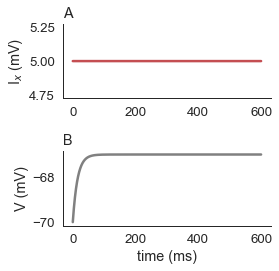

In [12]:
###############################################
## Import packages and specify some settings ##
###############################################
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# This makes plots show up and look nice
%matplotlib inline
sns.set(context='paper',style='white',font_scale=1.5,rc={"lines.linewidth":2.5})
sns.set_palette('muted')

# Keep this set to false unless you want to save figures and data
# (in which case you'll need to change some directories below)
SaveFigures=False
###############################################
###############################################

# Discretized time
T=600 
dt=.1 
time=np.arange(0,T,dt) 

# Neuron parameters
I0=5 
EL=-72 
taum=15 

# Initial condition
V0=-70 

# Compute V 
V=(V0-EL-I0)*np.exp(-time/taum)+EL+I0

# Make figure
plt.subplots(figsize=(4,4))

plt.subplot(2,1,1)
plt.plot(time,I0+0*time,color='r')
plt.ylabel('I$_x$ (mV)')
plt.title('A',loc='left')
sns.despine()


plt.subplot(2,1,2)
plt.plot(time,V,color='gray')
plt.xlabel('time (ms)')
plt.ylabel('V (mV)')
plt.title('B',loc='left')
sns.despine()
plt.tight_layout()


# Save figure if needed
if SaveFigures:
    plt.savefig('../Figures/LeakyIntegratorI0.pdf')

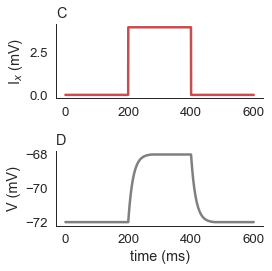

In [14]:
# Now do a simulation with time-varying input

# Discretized time
T=600 
dt=.1 
time=np.arange(0,T,dt) 

# Neuron parameters
EL=-72 
taum=15 

# Initial condition
V0=-70 

# Applied current
Ix=np.zeros_like(time) 
Ix[(time>=200) & (time<=400)]=4 


# Define a convolution kernel over a shorter time duration
s=np.arange(-5*taum,5*taum,dt)
k=(1/taum)*np.exp(-s/taum)*(s>=0) 

# Define V by convolution
V=EL+np.convolve(Ix,k,mode='same')*dt


# Make figure
plt.subplots(figsize=(4, 4))

plt.subplot(2,1,1)
plt.plot(time,Ix,color='r')
#plt.xlabel('time (ms)')
plt.ylabel('I$_x$ (mV)')
plt.title('C',loc='left')
sns.despine()


plt.subplot(2,1,2)
plt.plot(time,V,color='gray')
plt.xlabel('time (ms)')
plt.ylabel('V (mV)')
sns.despine()
plt.title('D',loc='left')
plt.tight_layout()


# Save figure if needed
if SaveFigures:
      plt.savefig('../Figures/LeakyIntegratorIt.pdf')